## 1) Importing libraries

In [1]:
import sys
import os
import lime
import lime.lime_tabular
sys.path.append(os.path.abspath("../../"))
from ml_classification import *
from generic_preprocessing import *
from IPython.display import HTML

C:\Users\Aayush - Carlson\Anaconda2\envs\py35\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## 2) Importing data

In [2]:
data = np.genfromtxt('adult.data.txt', delimiter=', ', dtype=str)
feature_names = [
    "Age", "Workclass", "fnlwgt", "Education", "Education-Num",
    "Marital Status", "Occupation", "Relationship", "Race", "Sex",
    "Capital Gain", "Capital Loss", "Hours per week", "Country", 'income'
]
data = pd.DataFrame(data)
data.columns = feature_names
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 3) EDA

In [3]:
## Printing Data size
print_dim(data)
## Printing some more informtion as columns names, data type, unique values and first 5 unique observation
print_dataunique(data)

Data size: Rows-32561 Columns-15
0 Age <class 'str'> 73 ['39' '50' '38' '53' '28']
1 Workclass <class 'str'> 9 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov']
2 fnlwgt <class 'str'> 21648 ['77516' '83311' '215646' '234721' '338409']
3 Education <class 'str'> 16 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th']
4 Education-Num <class 'str'> 16 ['13' '9' '7' '14' '5']
5 Marital Status <class 'str'> 7 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated']
6 Occupation <class 'str'> 15 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service']
7 Relationship <class 'str'> 6 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried']
8 Race <class 'str'> 5 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
9 Sex <class 'str'> 2 ['Male' 'Female']
10 Capital Gain <class 'str'> 119 ['2174' '0' '14084' '5178' '5013']
11 Capital Loss <class 'str'> 92 ['0' '2042' '1408' '1902' '1573']
12 Hours per week

In [4]:
## Defining numerical and categorical variables
numerical_features = list(data.columns[[0,2,4,10,11,12]])
categorical_features = list(data.columns[[1,3,5,6,7,8,9,13]])

In [5]:
## Converting numerical feature data type to float
for i in numerical_features:
    data.loc[:,i] = data.loc[:,i].astype(float)

## Checking new datatype
print_dataunique(data.loc[:,numerical_features])

0 Age <class 'numpy.float64'> 73 [39. 50. 38. 53. 28.]
1 fnlwgt <class 'numpy.float64'> 21648 [ 77516.  83311. 215646. 234721. 338409.]
2 Education-Num <class 'numpy.float64'> 16 [13.  9.  7. 14.  5.]
3 Capital Gain <class 'numpy.float64'> 119 [ 2174.     0. 14084.  5178.  5013.]
4 Capital Loss <class 'numpy.float64'> 92 [   0. 2042. 1408. 1902. 1573.]
5 Hours per week <class 'numpy.float64'> 94 [40. 13. 16. 45. 50.]


In [6]:
## Doing EDA
do_data_profiling(data,'profiled.html') ## An HTML is created in the base folder

Data profiling done


In [7]:
HTML(filename = 'profiled.html')

Number of variables,15
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## 4) Data processing

In [8]:
## creating a target variable
y_label = list(data.income.apply(lambda x: 1 if x == '>50K' else 0))
data.drop(['income'],axis = 1, inplace=True)

In [9]:
## One hot encoding categorical features
data_processed, le_dict = label_encoder(data,categorical_features)
data_processed.head()

Label encoding column - Workclass
Label encoding column - Education
Label encoding column - Marital Status
Label encoding column - Occupation
Label encoding column - Relationship
Label encoding column - Race
Label encoding column - Sex
Label encoding column - Country


,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5


In [10]:
## Creating hold-out CV
X_train, X_test, y_train, y_test = holdout_cv(data_processed,y_label,size =0.3)
X_train = X_train.reset_index(drop='index')
X_test = X_test.reset_index(drop='index')

## 5) Model Building - Binary Classification

In [11]:
## Running an Xgboost model to understand basic parameters tuning
_,_,_,xgb_model = runXGB(X_train, y_train, X_test, y_test)

Will train until test error hasn't decreased in 100 rounds.
[0]	train-auc:0.906302	test-auc:0.901551
[1]	train-auc:0.913758	test-auc:0.906756
[2]	train-auc:0.914128	test-auc:0.906379
[3]	train-auc:0.922490	test-auc:0.913257
[4]	train-auc:0.924560	test-auc:0.914106
[5]	train-auc:0.925022	test-auc:0.914676
[6]	train-auc:0.925900	test-auc:0.913968
[7]	train-auc:0.925798	test-auc:0.913897
[8]	train-auc:0.925826	test-auc:0.913637
[9]	train-auc:0.926697	test-auc:0.914465
[10]	train-auc:0.926753	test-auc:0.915062
[11]	train-auc:0.927409	test-auc:0.915597
[12]	train-auc:0.927606	test-auc:0.915923
[13]	train-auc:0.927590	test-auc:0.915726
[14]	train-auc:0.928014	test-auc:0.916212
[15]	train-auc:0.928863	test-auc:0.916826
[16]	train-auc:0.928818	test-auc:0.916832
[17]	train-auc:0.929016	test-auc:0.917045
[18]	train-auc:0.929912	test-auc:0.917537
[19]	train-auc:0.930263	test-auc:0.917737
[20]	train-auc:0.930422	test-auc:0.917547
[21]	train-auc:0.930624	test-auc:0.917610
[22]	train-auc:0.930986	te

[198]	train-auc:0.958109	test-auc:0.927406
[199]	train-auc:0.958223	test-auc:0.927410
[200]	train-auc:0.958356	test-auc:0.927458
[201]	train-auc:0.958438	test-auc:0.927468
[202]	train-auc:0.958482	test-auc:0.927485
[203]	train-auc:0.958564	test-auc:0.927513
[204]	train-auc:0.958606	test-auc:0.927524
[205]	train-auc:0.958656	test-auc:0.927525
[206]	train-auc:0.958775	test-auc:0.927482
[207]	train-auc:0.958786	test-auc:0.927524
[208]	train-auc:0.959021	test-auc:0.927517
[209]	train-auc:0.959122	test-auc:0.927551
[210]	train-auc:0.959261	test-auc:0.927556
[211]	train-auc:0.959341	test-auc:0.927555
[212]	train-auc:0.959462	test-auc:0.927554
[213]	train-auc:0.959474	test-auc:0.927562
[214]	train-auc:0.959639	test-auc:0.927523
[215]	train-auc:0.959756	test-auc:0.927526
[216]	train-auc:0.959819	test-auc:0.927501
[217]	train-auc:0.959906	test-auc:0.927517
[218]	train-auc:0.960037	test-auc:0.927506
[219]	train-auc:0.960122	test-auc:0.927522
[220]	train-auc:0.960297	test-auc:0.927538
[221]	train

In [24]:
## Running an Xgboost model fo model building and model explaination
pred_y_test, loss,_,xgb_model = runXGBC(X_train.values, y_train, X_test.values, y_test,rounds=180)

Train and Test loss :  0.9563434543592472 0.926923827629533


In [12]:
## Running an Xgboost model fo model building and model explaination
pred_y_test, loss,_,rf_model = runRF(X_train.values, y_train, X_test.values, y_test,rounds=180)

Train and Test loss :  0.9364038481819178 0.9157274173379215


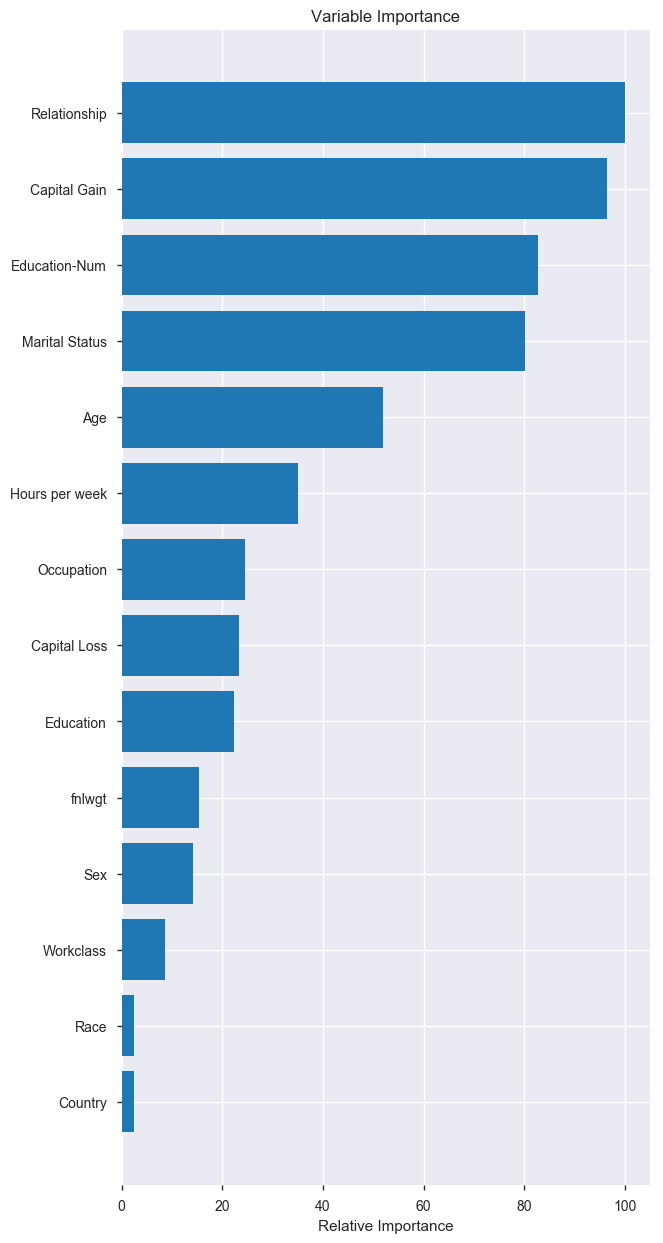

In [13]:
feature_importance(model=rf_model, X=X_train)

## 6) Model Explaination using Lime

In [14]:
xgb_predict_fn = make_prediction_function(xgb_model)

In [15]:
explainer = make_lime_explainer(X_train,c_names=['<50k','>50k'])

In [16]:
lime_explain(explainer=explainer,
             predict_fn=xgb_predict_fn, 
             df=X_test, 
             index = 0,
             num_features = 10,
             show_in_notebook=True,
             filename = 'explanation.html')

AttributeError: 'Booster' object has no attribute 'predict_proba'